# ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)

---
## 1. IMPORTAR PAQUETES
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

pd.options.display.float_format = '{:.2f}'.format

%config IPCompleter.greedy=True # Activa el autocompletar avanzado en Jupyter

sns.set_theme(style="whitegrid")

---
## 2. IMPORTAR DATOS
---

In [2]:
# Cargar el DataFrame desde pickle
df = pd.read_pickle("../data/processed/ecommerce_transformado.pkl")
df

,usuario,sesion,categoria,evento,producto,precio,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,2019-10-01,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,2019-10-01,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,2019-10-01,2019,10,1,0,2,50,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,2019-10-01,2019,10,1,0,3,41,0,0,0
2019-10-01 00:03:44,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,view,18082,16.03,2019-10-01,2019,10,1,0,3,44,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,2020-02-29,2020,2,29,23,58,49,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,2020-02-29,2020,2,29,23,58,57,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,2020-02-29,2020,2,29,23,59,5,0,0,0


---
## 3. SOBRE EL CUSTOMER JOURNAY 
---


---
### ANALIZANDO LA VARIABLE EVENTOS - VISIÓN GENERAL 
---
- El objetivo es analizar cuales son los pasos que da un cliente desde que llega a la web, visualiza productos y termina comprando

In [3]:
# Contar la cantidad de cada tipo de evento
eventos = df.evento.value_counts()

# Calcular el porcentaje de visualizaciones (view) sobre el total de eventos
porcentaje_view = (eventos['view'] / eventos.sum()) * 100

# Total de visualizaciones (view)
visualizaciones = 100

# Calcular el porcentaje de productos añadidos al carrito (cart) sobre las visualizaciones (view)
porcentaje_cart_sobre_view = (eventos['cart'] / eventos['view']) * 100

# Calcular la tasa de productos sacados del carrito (remove_from_cart) sobre los añadidos al carrito (cart)
porcentaje_remove_sobre_cart = (eventos['remove_from_cart'] / eventos['cart']) * 100

# Calcular la tasa de productos comprados (purchase) sobre los añadidos al carrito (cart)
porcentaje_purchase_sobre_cart = (eventos['purchase'] / eventos['cart']) * 100


# Crear el DataFrame con los valores proporcionados
data = {
    'kpi': ['visualizaciones', 'carrito', 'abandono', 'compra'],
    'valor': [visualizaciones, porcentaje_cart_sobre_view, porcentaje_remove_sobre_cart, porcentaje_purchase_sobre_cart],  
}

kpis = pd.DataFrame(data)

# Mostrar los resultados
print(f"Porcentaje de visualizaciones (view) sobre el total de eventos: {porcentaje_view:.2f}%")
print(f"\nPorcentaje de productos añadidos al carrito (cart) sobre el total de visualizaciones (view): {porcentaje_cart_sobre_view:.2f}%")
print(f"Porcentaje de productos sacados del carrito (remove_from_cart) sobre añadidos al carrito (cart): {porcentaje_remove_sobre_cart:.2f}%")
print(f"Porcentaje de productos comprados (purchase) sobre añadidos al carrito (cart): {porcentaje_purchase_sobre_cart:.2f}%")
display(kpis)

Porcentaje de visualizaciones (view) sobre el total de eventos: 46.36%

Porcentaje de productos añadidos al carrito (cart) sobre el total de visualizaciones (view): 59.75%
Porcentaje de productos sacados del carrito (remove_from_cart) sobre añadidos al carrito (cart): 71.42%
Porcentaje de productos comprados (purchase) sobre añadidos al carrito (cart): 22.20%


,kpi,valor
0,visualizaciones,100.00
1,carrito,59.75
2,abandono,71.42
3,compra,22.20


### Visualizamos la información en gráficos de funnel 

In [4]:
# Esta función recibe la variable de los eventos como entrada
def funnel_analytics_1(evento):
    
    # hacemos el conteo
    eventos = df.evento.value_counts()

    # preparamos las variables
    visualizaciones = 100
    porcentaje_cart_sobre_view = (eventos['cart'] / eventos['view']) * 100
    porcentaje_remove_sobre_cart = (eventos['remove_from_cart'] / eventos['cart']) * 100
    porcentaje_purchase_sobre_cart = (eventos['purchase'] / eventos['cart']) * 100
    
    kpis = pd.DataFrame({'kpi':['visualizaciones','carrito','compra'],
                         'valor':[visualizaciones, porcentaje_cart_sobre_view, porcentaje_purchase_sobre_cart]})

    # Crear el gráfico
    fig = go.Figure(go.Funnel(
    y = kpis['kpi'],  # Nombres de las etapas
    x = kpis['valor'].round(2),  # Valores en porcentaje
    marker = {'color': ['red', 'blue', 'green']},  # Colores personalizados
    opacity = 0.3,  # Opacidad de las barras
    textinfo = "value+percent initial"  # Mostrar valores y porcentaje inicial
    ))

    # Configurar el título del gráfico
    fig.update_layout(title = "- Porcentaje de productos añadidos al carrito sobre el total de visualizaciones <br>- Porcentaje de productos comprados sobre añadidos al carrito")

    # Mostrar el gráfico
    fig.show()

    #imprimimos un informe de conclusiones
    print(f'Porcentaje de productos añadidos al carrito (cart) sobre el total de visualizaciones (view): {porcentaje_cart_sobre_view:.2f}% ')
    print(f"Porcentaje de productos comprados (purchase) sobre añadidos al carrito (cart): {porcentaje_purchase_sobre_cart:.2f}%")
    print(f'\nPor tanto existe un {100 - porcentaje_cart_sobre_view.round(2)}% de visualizaciones sobre las que trabajar para conseguir más carritos, y un {100 - porcentaje_purchase_sobre_cart.round(2)}% de carritos sobre los que trabajar para conseguir más compras.')

funnel_analytics_1(df.evento)

Porcentaje de productos añadidos al carrito (cart) sobre el total de visualizaciones (view): 59.75% 
Porcentaje de productos comprados (purchase) sobre añadidos al carrito (cart): 22.20%

Por tanto existe un 40.25% de visualizaciones sobre las que trabajar para conseguir más carritos, y un 77.8% de carritos sobre los que trabajar para conseguir más compras.


In [5]:
# Esta función recibe la variable de los eventos como entrada
def funnel_analytics_2(evento):
    
    # hacemos el conteo
    eventos = df.evento.value_counts()

    # preparamos las variables
    carrito = 100
    porcentaje_remove_sobre_cart = (eventos['remove_from_cart'] / eventos['cart']) * 100
    porcentaje_purchase_sobre_cart = (eventos['purchase'] / eventos['cart']) * 100
    
    kpis = pd.DataFrame({'kpi':['carrito','abandono','compra'],
                         'valor':[carrito, porcentaje_remove_sobre_cart, porcentaje_purchase_sobre_cart]})
    
    # Crear el gráfico
    fig = go.Figure(go.Funnel(
    y = kpis['kpi'],  # Nombres de las etapas
    x = kpis['valor'].round(2),  # Valores en porcentaje
    marker = {'color': ['red', 'blue', 'green']},  # Colores personalizados
    opacity = 0.3,  # Opacidad de las barras
    textinfo = "value+percent initial"  # Mostrar valores y porcentaje inicial
    ))

    # Configurar el título del gráfico
    fig.update_layout(title = "- Porcentaje de productos sacados del carrito sobre añadidos al carrito <br>- Porcentaje de productos comprados sobre añadidos al carrito")

    # Mostrar el gráfico
    fig.show()

    #imprimimos un informe de conclusiones
    print(f'Porcentaje de productos sacados del carrito (remove_from_cart) sobre el total de añadidos al carrito (cart): {porcentaje_remove_sobre_cart:.2f}%')
    print(f"Porcentaje de productos comprados (purchase) sobre el total de añadidos al carrito (cart): {porcentaje_purchase_sobre_cart:.2f}%")
    print(f'\nPor tanto existe un {porcentaje_remove_sobre_cart.round(2)}% de abandonos sobre los que se puede trabajar')

funnel_analytics_2(df.evento)

Porcentaje de productos sacados del carrito (remove_from_cart) sobre el total de añadidos al carrito (cart): 71.42%
Porcentaje de productos comprados (purchase) sobre el total de añadidos al carrito (cart): 22.20%

Por tanto existe un 71.42% de abandonos sobre los que se puede trabajar


---
### Calculo de la facturacion media por mes
---

In [6]:
facturacion_por_mes = df.loc[df.evento == 'purchase'].groupby('mes').precio.sum()
print(f"Facturación por mes: \n{facturacion_por_mes}\n")

# Calcular la facturación media por mes
facturacion_media = facturacion_por_mes.mean()
print(f"Facturación media por mes: {facturacion_media:.2f}\n")

Facturación por mes: 
mes
1    135174.45
2    121330.67
10   116519.04
11   146491.24
12   102034.20
Name: precio, dtype: float64

Facturación media por mes: 124309.92



---
### Media de cada evento por sesión
---

In [7]:
# Agrupar por 'sesion_usuario' y 'evento', y contar los productos
eventos_por_sesion = df.groupby(['sesion', 'evento'], observed=True).producto.count().unstack().fillna(0)

# Calcular la media de cada tipo de evento por sesión
media_eventos_sesion = eventos_por_sesion.mean()

# Reordenar la salida en el orden deseado
orden = ['view', 'cart', 'remove_from_cart', 'purchase']
media_eventos_sesion = media_eventos_sesion.reindex(orden)

# Mostrar los resultados
print("Media de eventos por sesión (ordenados):")
print(media_eventos_sesion)
print("\nSe deben incrementar la media de visualizaciones, carritos y compras por sesión y disminuir los abandonos de carrito.")

Media de eventos por sesión (ordenados):
evento
view               2.16
cart               1.29
remove_from_cart   0.92
purchase           0.29
dtype: float64

Se deben incrementar la media de visualizaciones, carritos y compras por sesión y disminuir los abandonos de carrito.


---
### Visualizaciones de eventos por hora
---

Total de eventos por hora:

evento   cart  purchase  remove_from_cart   view
hora                                            
0        6475       962              3238   8731
1        5555      1128              3930   7280
2        6433      1220              3509   8378
3        8544      1535              5331  11807
4       11242      2389              8095  18365
5       16890      3491             11913  27438
6       21993      5125             16223  38055
7       27069      5951             17883  46072
8       29526      7158             21156  49587
9       32095      7593             21680  54185
10      32901      7816             23982  56458
11      33284      8495             25496  57594
12      34258      8250             23714  57530
13      31996      8133             22852  55534
14      30451      7122             21835  52184
15      28789      6485             20162  49809
16      28775      6531             19791  51055
17      32525      6242             24330

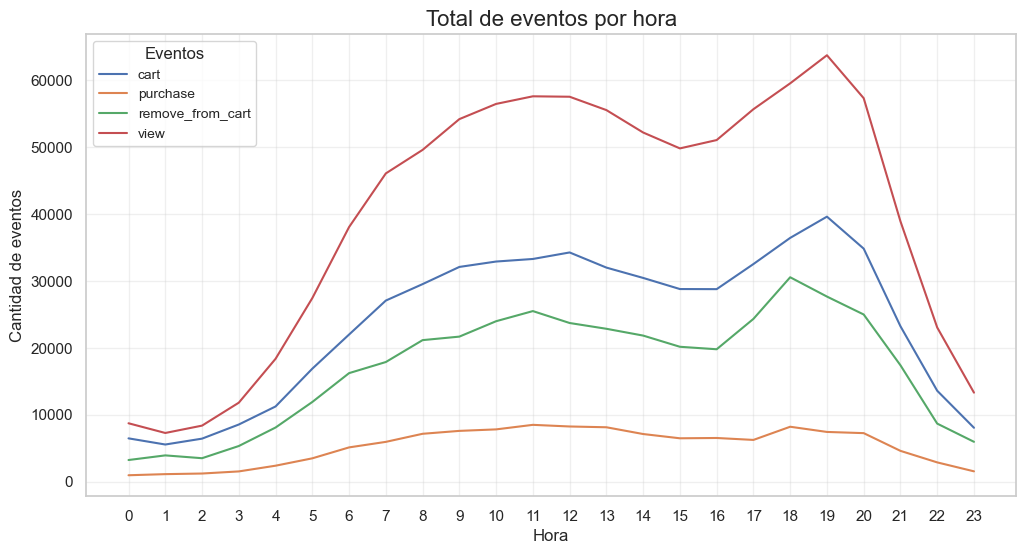

In [8]:
# Agrupar por 'hora' y 'evento', y contar los eventos
eventos_por_hora = df.groupby(['hora', 'evento'], observed = True).size().unstack(fill_value=0)

# Crear el gráfico de líneas para todos los eventos
plt.figure(figsize=(12, 6))
for evento in eventos_por_hora.columns:
    plt.plot(eventos_por_hora.index, eventos_por_hora[evento], label=evento)

# Configurar el título y las etiquetas
plt.title("Total de eventos por hora", fontsize=16)
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Cantidad de eventos", fontsize=12)
plt.xticks(range(0, 24))  # Asegurar que las horas estén en el rango 0-23
plt.legend(title="Eventos", fontsize=10)
plt.grid(alpha=0.3)

# Mostrar el DataFrame resultante
print("Total de eventos por hora:\n")
print(eventos_por_hora);

---
### Porcentaje de compras sobre visitas por hora
---
- Localizamos las horas donde tenemos mayor y menor tasa de conversión

evento   view   cart  remove_from_cart  purchase  compras_visitas
hora                                                             
0        8731   6475              3238       962            11.02
1        7280   5555              3930      1128            15.49
2        8378   6433              3509      1220            14.56
3       11807   8544              5331      1535            13.00
4       18365  11242              8095      2389            13.01
5       27438  16890             11913      3491            12.72
6       38055  21993             16223      5125            13.47
7       46072  27069             17883      5951            12.92
8       49587  29526             21156      7158            14.44
9       54185  32095             21680      7593            14.01
10      56458  32901             23982      7816            13.84
11      57594  33284             25496      8495            14.75
12      57530  34258             23714      8250            14.34
13      55

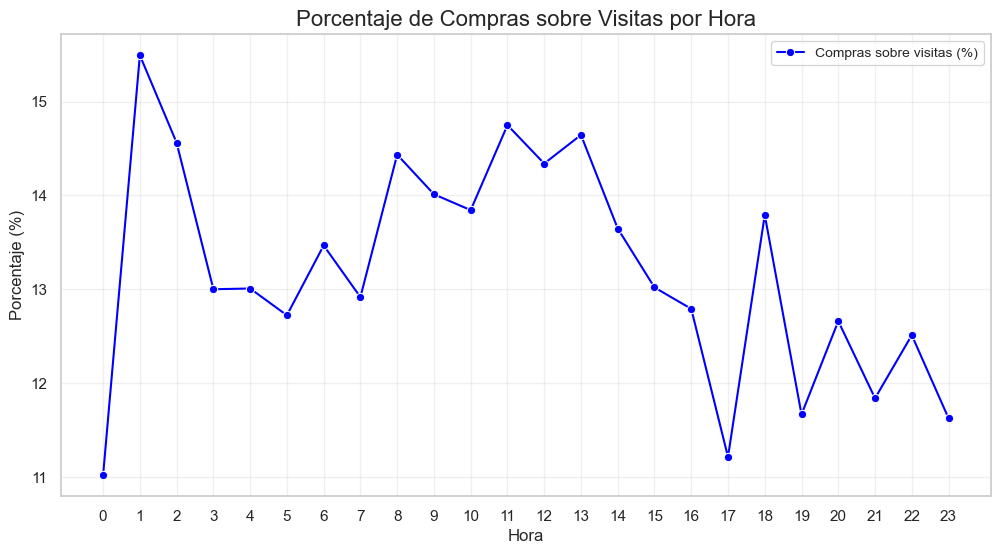

In [9]:
# Calcular la proporción de compras sobre visitas por hora
eventos_por_hora['compras_visitas'] = eventos_por_hora['purchase'] / eventos_por_hora['view'] * 100

# Ordenadar las variables
eventos_por_hora = eventos_por_hora[['view', 'cart', 'remove_from_cart', 'purchase', 'compras_visitas']]

print(eventos_por_hora)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=eventos_por_hora.index,  # Eje X: las horas
    y=eventos_por_hora['compras_visitas'],  # Eje Y: porcentaje de compras sobre visitas
    marker='o',  # Marcadores en los puntos
    color='blue',  # Color de la línea
    label='Compras sobre visitas (%)'
)

# Configurar el título y las etiquetas
plt.title("Porcentaje de Compras sobre Visitas por Hora", fontsize=16)
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(range(0, 24))  # Asegurar que las horas estén en el rango 0-23
plt.legend(fontsize=10)
plt.grid(alpha=0.3);

* Las horas en las que la gente compra más son la 1, las 8, de 11 a 13 y las 18 por lo que estos horarios seria buen momento para hacer campañas de publicidad o retargeting
* Las horas en las que la gente no compra son las 24, de 3 a 7, de 14 a 17 y de 19 a 23

---
### Analisis semanal de los eventos
---

Tendencia semanal de eventos:

evento       view   cart  remove_from_cart  purchase
fecha                                               
2019-10-06  36353  31483             14647      4440
2019-10-13  44410  28151             17989      5422
2019-10-20  39486  23920             15303      5033
2019-10-27  40383  25651             18411      5665
2019-11-03  39365  24087             16491      5746
2019-11-10  46177  29142             24008      6663
2019-11-17  41170  25335             17215      5141
2019-11-24  56477  38069             27973      9754
2019-12-01  48883  31994             23106      7493
2019-12-08  42055  23265             19443      5105
2019-12-15  45874  24636             18246      5953
2019-12-22  39237  19927             15452      4701
2019-12-29  32803  17051             11102      3705
2020-01-05  31909  16735             13464      3294
2020-01-12  46873  26264             17956      5589
2020-01-19  50210  28402             22945      6913
2020-01-26  484

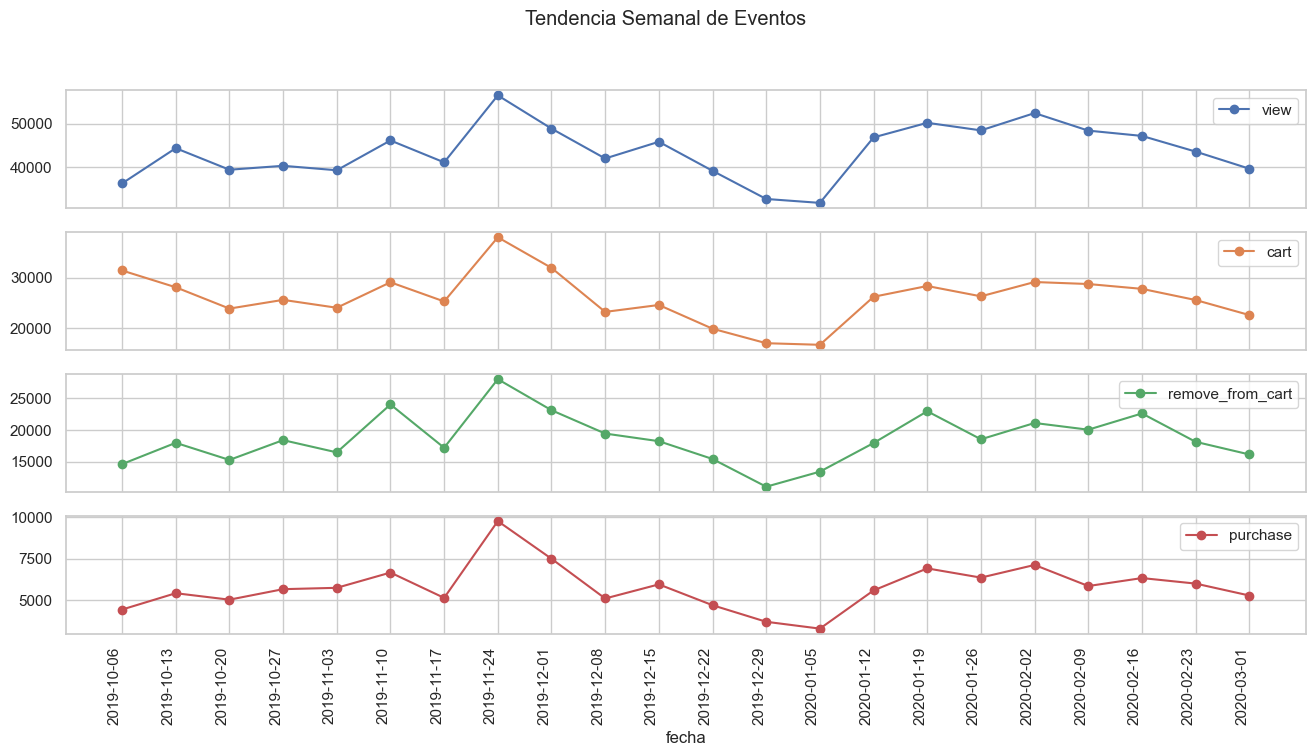

In [10]:
# Analizar la tendencia de eventos por semana
tendencia = df.groupby('evento', observed = True).resample('W').evento.count().unstack(level = 0)

# Ordenar las columnas de acuerdo a la secuencia de eventos
tendencia = tendencia[['view', 'cart', 'remove_from_cart', 'purchase']]

# Mostrar el análisis semanal
print("Tendencia semanal de eventos:\n")
print(tendencia)

# Crear el gráfico de líneas para la tendencia semanal
tendencia.plot(subplots = True, figsize=(16, 8), 
               xticks = tendencia.index, 
               x_compat = True, 
               rot = 90, 
               title="Tendencia Semanal de Eventos", 
               marker='o');

- Durante el mes de diciembre disminuyen notablemente todos los valores de los eventos, posiblemente el motivo es por que los clientes compran en Black Friday que es la ultima semana de Noviembre y se puede ver claramente que es donde esta el pico mas alto de todos los valores de los eventos.

---
### Analisis diario de los eventos de Noviembre y Diciembre
---

Análisis diario de los eventos en noviembre y diciembre:
evento       view  cart  remove_from_cart  purchase
fecha                                              
2019-11-01   5352  3565              2810       709
2019-11-02   4857  3015              2124       912
2019-11-03   5583  3540              2622       755
2019-11-04   6248  4652              4854       676
2019-11-05   7213  4118              2711       753
2019-11-06   7388  4444              3130       945
2019-11-07   7799  5323              4262      1549
2019-11-08   7180  4514              3963      1598
2019-11-09   4893  2729              1844       450
2019-11-10   5456  3362              3244       692
2019-11-11   6302  3545              2870       803
2019-11-12   5523  3643              2058       831
2019-11-13   6408  4253              3122       665
2019-11-14   6011  4088              2421       670
2019-11-15   5667  3755              2551       766
2019-11-16   5402  2785              1978       572
2019-11

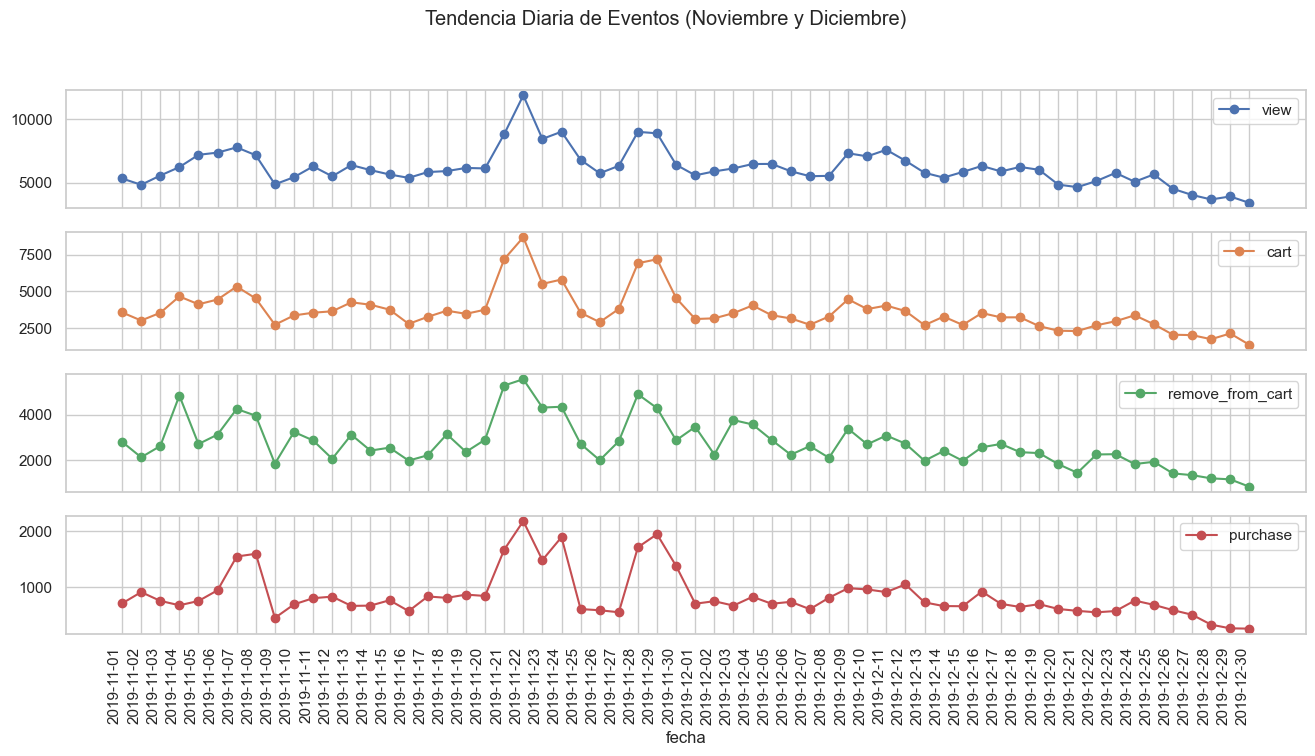

In [11]:

# Filtrar los datos para los meses de noviembre y diciembre
tendencia_diaria_nov_dic = df.query("'2019-11-01' <= fecha <= '2019-12-31'").groupby('evento', observed = True).resample('D').evento.count().unstack(level = 0)

# Ordenar las columnas de acuerdo a la secuencia de eventos
tendencia_diaria_nov_dic = tendencia_diaria_nov_dic[['view', 'cart', 'remove_from_cart', 'purchase']]

# Mostrar el análisis diario
print("Análisis diario de los eventos en noviembre y diciembre:")
print(tendencia_diaria_nov_dic)

# Crear el gráfico de líneas para la tendencia diaria
tendencia_diaria_nov_dic.plot(subplots = True, figsize=(16, 8), 
                       xticks = tendencia_diaria_nov_dic.index, 
                       x_compat = True, 
                       rot = 90, 
                       title="Tendencia Diaria de Eventos (Noviembre y Diciembre)", 
                       marker='o');

* El pico coincide con el black friday (día 29)
* Pero aún hay un pico mayor unos días antes, el día 22, posiblemente por el inicio de la semana black friday
* Los días de Navidad tienen una tendencia decreciente, lo que significa que los consumidores claramente han adelantado sus compras

---
### Analisis diario de los eventos de Enero y Febrero
---

Análisis diario de los eventos en enero y febrero:
evento      view  cart  remove_from_cart  purchase
fecha                                             
2020-01-01  3671  2016              1671       286
2020-01-02  5451  2834              1969       522
2020-01-03  5352  2725              1989       551
2020-01-04  6048  3434              2931       671
2020-01-05  6229  3799              3634       892
2020-01-06  5205  2922              1855       639
2020-01-07  6261  3386              2559       716
2020-01-08  6846  3685              2606       867
2020-01-09  7669  4779              3015      1076
2020-01-10  6803  4051              2281       816
2020-01-11  6780  3324              2580       655
2020-01-12  7309  4117              3060       820
2020-01-13  7680  4934              3569      1068
2020-01-14  8034  4289              4615      1078
2020-01-15  7467  4547              3351      1053
2020-01-16  7304  4262              2748      1330
2020-01-17  7079  3540         

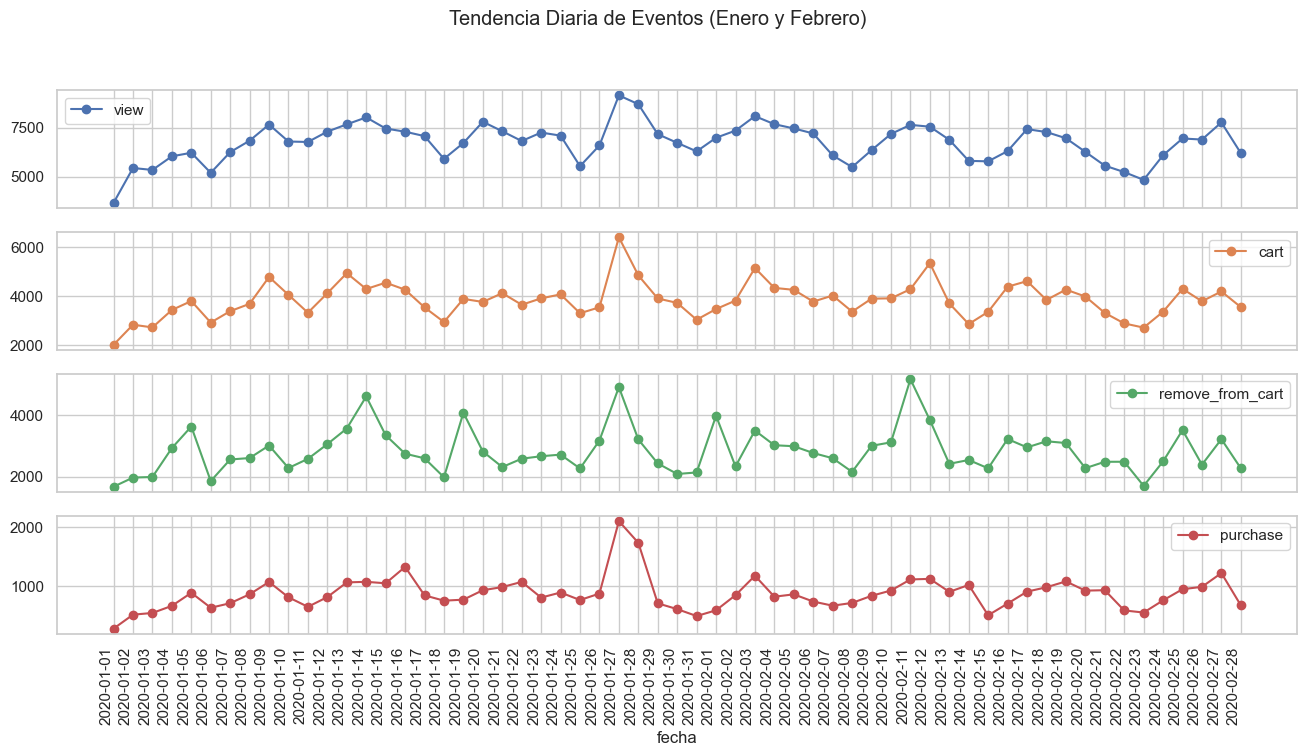

In [12]:
# Filtrar los datos para los meses de Enero y Febrero
tendencia_diaria_ene_feb = df.query("'2020-01-01' <= fecha <= '2020-02-29'").groupby('evento', observed = True).resample('D').evento.count().unstack(level = 0)

# Ordenar las columnas de acuerdo a la secuencia de eventos
tendencia_diaria_ene_feb = tendencia_diaria_ene_feb[['view', 'cart', 'remove_from_cart', 'purchase']]

# Mostrar el análisis diario
print("Análisis diario de los eventos en enero y febrero:")
print(tendencia_diaria_ene_feb)

# Crear el gráfico de líneas para la tendencia diaria
tendencia_diaria_ene_feb.plot(subplots = True, figsize=(16, 8), 
                                      xticks = tendencia_diaria_ene_feb.index, 
                                      x_compat = True, 
                                      rot = 90, 
                                      title="Tendencia Diaria de Eventos (Enero y Febrero)", 
                                      marker='o');


* Durante la semana de Reyes no hay pico de ventas, ni los días previos a San Valentín, pero sí hay un pico muy pronunciado el 27 de Enero, seguramente algún evento local seguramente coincide con la celebracion del año nuevo chino en Rusia.


**➢ INSIGHT** La gran conclusión es que la mayor parte de las compras navideñas se reparte en la semana del black friday

---
### Analisis por día y hora de las compras
---

date,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,...,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
hora,,,,,,,,,,,,,,,,,,,,,
0,13.00,18.00,1.00,2.00,0.00,0.00,0.00,0.00,3.00,23.00,...,28.00,0.00,0.00,0.00,0.00,55.00,5.00,40.00,0.00,0.00
1,0.00,0.00,5.00,0.00,4.00,24.00,3.00,0.00,16.00,0.00,...,0.00,5.00,0.00,2.00,21.00,11.00,0.00,5.00,26.00,33.00
2,0.00,0.00,0.00,24.00,0.00,0.00,0.00,18.00,4.00,18.00,...,9.00,0.00,0.00,10.00,0.00,34.00,0.00,0.00,0.00,8.00
3,0.00,24.00,10.00,0.00,0.00,26.00,2.00,20.00,16.00,55.00,...,0.00,14.00,13.00,0.00,5.00,15.00,0.00,10.00,0.00,0.00
4,15.00,0.00,45.00,27.00,3.00,24.00,12.00,46.00,56.00,0.00,...,6.00,22.00,34.00,17.00,7.00,16.00,10.00,148.00,16.00,0.00
5,49.00,9.00,6.00,17.00,1.00,14.00,21.00,10.00,0.00,43.00,...,23.00,8.00,28.00,0.00,14.00,103.00,6.00,48.00,11.00,3.00
6,23.00,34.00,18.00,10.00,10.00,13.00,38.00,35.00,14.00,12.00,...,7.00,22.00,5.00,46.00,26.00,20.00,94.00,26.00,58.00,35.00
7,26.00,60.00,26.00,54.00,58.00,20.00,63.00,27.00,26.00,59.00,...,98.00,67.00,52.00,10.00,30.00,23.00,30.00,53.00,38.00,65.00
8,28.00,71.00,129.00,49.00,20.00,37.00,27.00,41.00,89.00,62.00,...,30.00,95.00,35.00,52.00,30.00,17.00,120.00,80.00,67.00,25.00


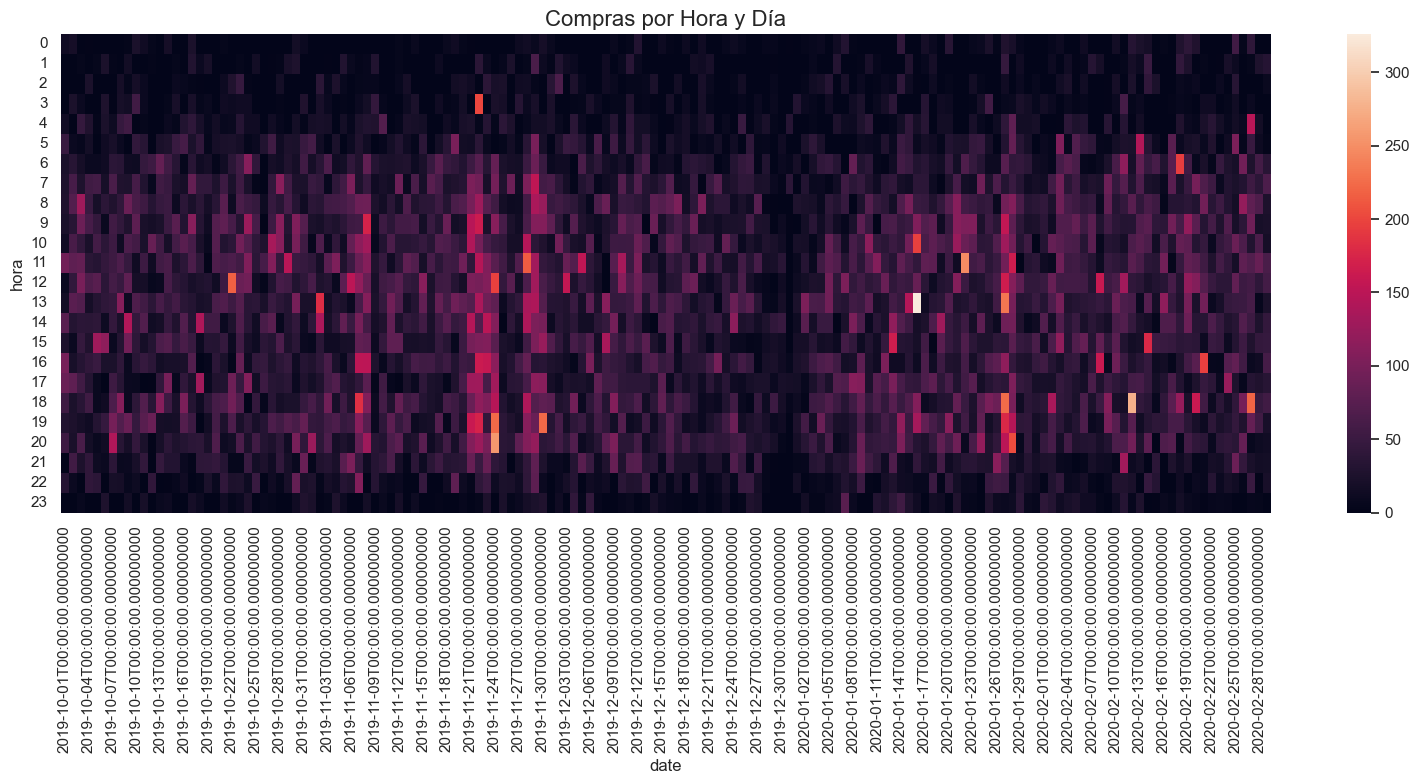

In [13]:
# Agrupar por fecha y hora
#compras_dia_hora = df.loc[df.evento == 'purchase'].groupby(['date', 'hora']).size().unstack(level=0).fillna(0)
compras_dia_hora = df.loc[df.evento == 'purchase'].groupby(['date', 'hora']).evento.count().unstack(level=0).fillna(0)

# Mostrar la tabla
display(compras_dia_hora)

# Crear el gráfico de calor
plt.figure(figsize=(16, 8))
sns.heatmap(compras_dia_hora)
plt.title("Compras por Hora y Día", fontsize=16)
plt.xlabel("date", fontsize=12)
plt.ylabel("hora", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout();




---
## 3. SOBRE LOS CLIENTES
---

In [14]:
df

,usuario,sesion,categoria,evento,producto,precio,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,2019-10-01,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,2019-10-01,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,2019-10-01,2019,10,1,0,2,50,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,2019-10-01,2019,10,1,0,3,41,0,0,0
2019-10-01 00:03:44,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,view,18082,16.03,2019-10-01,2019,10,1,0,3,44,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,2020-02-29,2020,2,29,23,58,49,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,2020-02-29,2020,2,29,23,58,57,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,2020-02-29,2020,2,29,23,59,5,0,0,0


- Creamos un DataFrame a nivel de clientes

In [15]:
# Filtramos todos los registros que sean eventos de compra (purchase) para descartar los usuarios que no han realizado compras
clientes = df.query("evento == 'purchase'").groupby('usuario').agg({'producto':'count', # número total de productos que el usuario ha comprado
                                                         'sesion':'nunique', # número de veces que el usuario ha comprado, cada sesion es una compra, aunque en una misma sesion compre varios productos
                                                         'precio':'mean', # precio medio de los productos comprados por el usuario
                                                         'date':'max'}) # ultima fecha en la que el usuario ha realizado una compra

# Renombramos las columnas
clientes.rename(columns={'producto':'num_productos_comprados', 
                          'sesion':'num_compras_totales', 
                          'precio':'precio_medio_producto', 
                          'date':'ult_compra'}, inplace=True)

# Agregando nuevas columnas
clientes['gasto_total'] = clientes.num_productos_comprados * clientes.precio_medio_producto # total gastado por el cliente
clientes['productos_por_compra'] = clientes.num_productos_comprados / clientes.num_compras_totales # número de productos comprados por compra

clientes

,num_productos_comprados,num_compras_totales,precio_medio_producto,ult_compra,gasto_total,productos_por_compra
usuario,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00
27756757,1,1,20.63,2020-01-27,20.63,1.00
50748978,9,1,1.11,2019-12-14,10.01,9.00
52747911,3,1,7.67,2019-10-10,23.02,3.00
65241811,5,1,8.36,2019-11-11,41.79,5.00
...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00
622021687,1,1,13.33,2020-02-29,13.33,1.00
622041514,3,1,0.63,2020-02-29,1.90,3.00


### Como se distribuyen los clientes con respecto al gasto total

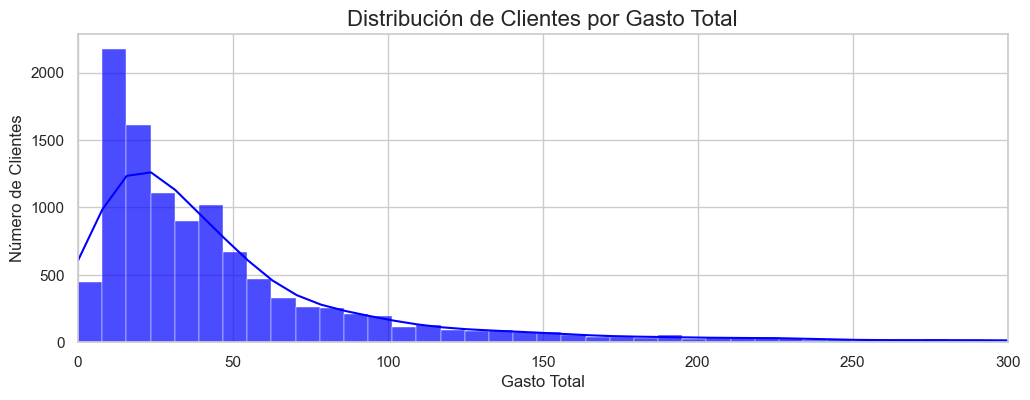

In [16]:

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un histograma para visualizar la distribución del gasto total
plt.figure(figsize=(12, 4))
sns.histplot(data=clientes, x='gasto_total', bins = 200, kde=True, color='blue', alpha=0.7)
plt.xlim(0, 300)  # Limitar el eje x para enfocarnos en el rango de gasto total

# Configurar el título y las etiquetas
plt.title("Distribución de Clientes por Gasto Total", fontsize=16)
plt.xlabel("Gasto Total", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12);



- La mayoria de los clientes han gastado menos de 50€ en el periodo

### Como se distribuyen los clientes con relación a la frecuencia de compra

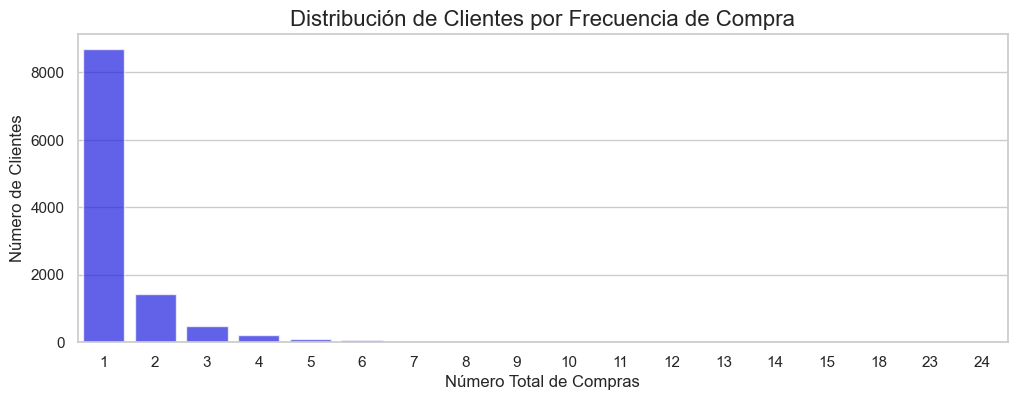

In [17]:
# Crear un gráfico de barras con countplot para visualizar la distribución de la frecuencia de compra
plt.figure(figsize=(12, 4))
sns.countplot(data = clientes, x = 'num_compras_totales', color = 'blue', alpha = 0.7)

# Configurar el título y las etiquetas
plt.title("Distribución de Clientes por Frecuencia de Compra", fontsize = 16)
plt.xlabel("Número Total de Compras", fontsize = 12)
plt.ylabel("Número de Clientes", fontsize = 12);



- La mayoria de los clienttes realizan solo una compra, existe una opotunidad de mejorar esta palanca fidelizando clientes lo que incrementaria significativamente la facturación

**➢ INSIGHT** La mayoría de los clientes solo hace una compra

### Cuantos productos de media compra un cliente en cada compra

count   11040.00
mean        7.79
std         9.49
min         1.00
25%         3.00
50%         5.00
75%        10.00
max       219.00
Name: productos_por_compra, dtype: float64


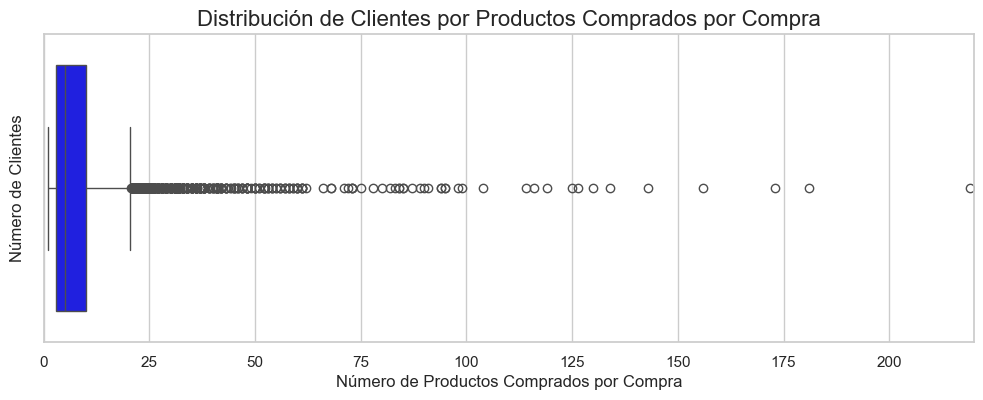

In [18]:
print(clientes.productos_por_compra.describe())

# crear un grafico de bigotes para ver outliers
plt.figure(figsize=(12, 4))
sns.boxplot(data = clientes, x = 'productos_por_compra', color = 'blue')
plt.xlim(0, 220)  # Limitar el eje x para enfocarnos en el rango de productos por compra

# Configurar el título y las etiquetas
plt.title("Distribución de Clientes por Productos Comprados por Compra", fontsize=16)
plt.xlabel("Número de Productos Comprados por Compra", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12);


- Hay un 25% de los clientes que realizan mas 10 de compras, lo que quiere decir que los clientes compran, se deben realizar acciones para incrementar el numero medio de productos por compra

**➢ INSIGHT** La compra de la mediana es de 5 productos

### Quienes son los clientes que mas han comprado o gastado

In [19]:
# Filtrar los 10 clientes con mayor gasto total
display(clientes.nlargest(n = 10, columns = 'gasto_total'))

# Explorar la estadística descriptiva del gasto total
clientes.gasto_total.describe()

,num_productos_comprados,num_compras_totales,precio_medio_producto,ult_compra,gasto_total,productos_por_compra
usuario,,,,,,
573823111,268,2,5.82,2020-02-21,1559.21,134.00
539751397,236,13,6.16,2020-02-19,1453.37,18.15
556579890,506,4,2.75,2020-02-27,1392.45,126.50
442763940,195,8,6.37,2019-12-23,1241.53,24.38
561592095,94,3,11.81,2019-10-31,1109.70,31.33
527739278,244,13,4.39,2020-02-16,1071.00,18.77
527806771,195,13,4.86,2020-02-20,948.01,15.00
430220205,190,6,4.99,2020-02-29,947.30,31.67
491009486,219,1,4.32,2020-02-12,946.20,219.00


count   11040.00
mean       56.30
std        81.73
min         0.13
25%        16.22
50%        32.74
75%        60.30
max      1559.21
Name: gasto_total, dtype: float64

- **➢ INSIGHT** Existen clientes que su gasto esta muy por encima de la media, pueden ser clientes que compran para revender el producto, si la empresa no tiene en cuenta este tipo de cliente esta palanca es importante para crear algun tipo de estrtategia para dirigerse a clientes profesionales.

### ¿Cual es la supervivencia de los clientes?

In [20]:
# Preparamos un dataframe solo con compradores y con las variables usuario y mes.
c = df.loc[df.evento == 'purchase', ['usuario','mes']]
print(c)

# Pasamos los meses a columnas
c = pd.crosstab(c.usuario,c.mes).reset_index()
print(c)

                       usuario  mes
fecha                              
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
...                        ...  ...
2020-02-29 22:29:19  622065819    2
2020-02-29 22:29:19  622065819    2
2020-02-29 22:29:19  622065819    2
2020-02-29 22:29:19  622065819    2
2020-02-29 23:26:42  610361057    2

[127564 rows x 2 columns]
mes      usuario  1  2  10  11  12
0       25392526  0  0   0   0   3
1       27756757  1  0   0   0   0
2       50748978  0  0   0   0   9
3       52747911  0  0   3   0   0
4       65241811  0  0   0   5   0
...          ... .. ..  ..  ..  ..
11035  621995551  0  5   0   0   0
11036  622021687  0  1   0   0   0
11037  622041514  0  3   0   0   0
11038  622042698  0  3   0   0   0
11039  622065819  0  4   0   0   0

[11040 rows x 6 columns]


In [21]:
# Renombramos y eliminamos el usuario c1 = oct, c2 = nov, c3 = dic, c4 = ene, c5 = feb
c.columns = ['usuario','c4','c5','c1','c2','c3']
c.drop(columns = 'usuario', inplace = True)
c

,c4,c5,c1,c2,c3
0,0,0,0,0,3
1,1,0,0,0,0
2,0,0,0,0,9
3,0,0,3,0,0
4,0,0,0,5,0
...,...,...,...,...,...
11035,0,5,0,0,0
11036,0,1,0,0,0
11037,0,3,0,0,0
11038,0,3,0,0,0


In [22]:
# establecemos la base / clientes que en el mes 1 no han tenido ninguna compra / clientes q en el mes 2 han tenido alguna compra
c2 = c.loc[(c.c1 == 0) & (c.c2 > 0)]
print(c2)

# Pasamos a un dataframe binario ya que solo nos importa si ese cliente ha comprado o no en cada mes
def binarizar(variable):
    variable = variable.transform(lambda x: 1 if (x > 0) else 0)
    return(variable)

c2_b = c2.apply(binarizar)
print(c2_b)

# Calculamos la media de supervivientes en cada uno de los meses posteriores
c2_f = c2_b.sum() / c2_b.shape[0]
c2_f = c2_f.sort_index()
(c2_f)

      c4  c5  c1  c2  c3
4      0   0   0   5   0
6      0   0   0  10   0
8      0   0   0  27  17
9      0   0   0   3   0
13     0   0   0   4   0
...   ..  ..  ..  ..  ..
7702   0   0   0   5   0
7703   0   5   0   2   0
7705   0   0   0   1   0
7708   0   0   0   5   6
7709   0   0   0   1   0

[2640 rows x 5 columns]
      c4  c5  c1  c2  c3
4      0   0   0   1   0
6      0   0   0   1   0
8      0   0   0   1   1
9      0   0   0   1   0
13     0   0   0   1   0
...   ..  ..  ..  ..  ..
7702   0   0   0   1   0
7703   0   1   0   1   0
7705   0   0   0   1   0
7708   0   0   0   1   1
7709   0   0   0   1   0

[2640 rows x 5 columns]


c1   0.00
c2   1.00
c3   0.10
c4   0.10
c5   0.08
dtype: float64

In [23]:
# establecemos la base / clientes que en el mes 2 no han tenido ninguna compra / clientes q en el mes 3 han tenido alguna compra
# Pasamos a un dataframe binario ya que solo nos importa si ese cliente ha comprado o no en cada mes
# Calculamos la media de supervivientes en cada uno de los meses posteriores
c3 = c.loc[(c.c2 == 0) & (c.c3 > 0)]
c3_b = c3.apply(binarizar)
c3_f = c3_b.sum() / c3_b.shape[0]
c3_f = c3_f.sort_index()
c3_f['c1'] = 0
c3_f


c1   0.00
c2   0.00
c3   1.00
c4   0.10
c5   0.08
dtype: float64

In [24]:
# establecemos la base / clientes que en el mes 3 no han tenido ninguna compra / clientes q en el mes 4 han tenido alguna compra
# Pasamos a un dataframe binario ya que solo nos importa si ese cliente ha comprado o no en cada mes
# Calculamos la media de supervivientes en cada uno de los meses posteriores
c4 = c.loc[(c.c3 == 0) & (c.c4 > 0)]
c4_b = c4.apply(binarizar)
c4_f = c4_b.sum() / c4_b.shape[0]
c4_f = c4_f.sort_index()
c4_f['c1'] = 0
c4_f['c2'] = 0
c4_f


c1   0.00
c2   0.00
c3   0.00
c4   1.00
c5   0.12
dtype: float64

     c2   c3   c4
c1 0.00 0.00 0.00
c2 1.00 0.00 0.00
c3 0.10 1.00 0.00
c4 0.10 0.10 1.00
c5 0.08 0.08 0.12
     c2   c3   c4   c5
c2 1.00 0.10 0.10 0.08
c3 0.00 1.00 0.10 0.08
c4 0.00 0.00 1.00 0.12


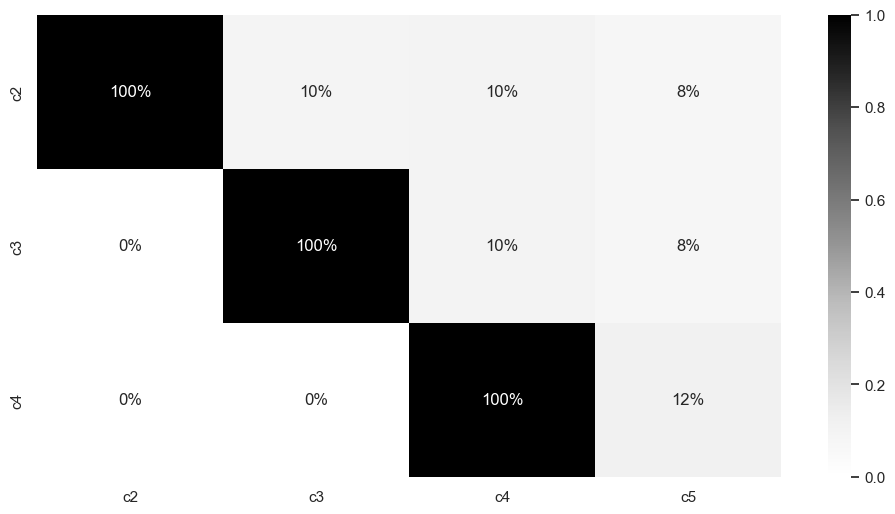

In [25]:
# Creamos el DataFrame
cor = pd.DataFrame({'c2':c2_f,'c3':c3_f,'c4':c4_f})
print(cor)


cor = cor.drop(index = 'c1').T
print(cor)


plt.figure(figsize = (12,6))
sns.heatmap(cor,annot = True, fmt = '.0%', cmap='Greys');

**INSIGHT**: El 90% de que los nuevos clientes no vuelve a comprar en los meses posteriores


In [26]:
df

,usuario,sesion,categoria,evento,producto,precio,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,2019-10-01,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,2019-10-01,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,2019-10-01,2019,10,1,0,2,50,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,2019-10-01,2019,10,1,0,3,41,0,0,0
2019-10-01 00:03:44,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,view,18082,16.03,2019-10-01,2019,10,1,0,3,44,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,2020-02-29,2020,2,29,23,58,49,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,2020-02-29,2020,2,29,23,58,57,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,2020-02-29,2020,2,29,23,59,5,0,0,0


---
## 3. SOBRE LOS PRODUCTOS
---

In [27]:
# Creamos un dataframe a nivel de producto para poder analizar esta dimensión.
# calculamos los conteos de cada evento en cada producto.

prod = df.groupby(['producto','evento']).size()
prod  = prod.unstack(level = 1).fillna(0).reset_index()
prod

/var/folders/q_/l7nzln2x6wn35pwv527w47mc0000gn/T/ipykernel_1855/3630446219.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



evento,producto,cart,purchase,remove_from_cart,view
0,3752,0,0,0,10
1,3762,127,28,59,258
2,3763,10,2,2,51
3,3771,0,0,0,9
4,3774,26,7,13,76
...,...,...,...,...,...
45322,5932537,1,0,0,1
45323,5932538,0,0,0,1
45324,5932540,1,0,0,2
45325,5932578,0,0,0,1


In [28]:
# Vamos a incorporar el precio, para ello primero creamos un maestro de precios por producto.

maestro_precios = df.groupby('producto', as_index = False).precio.mean()
print(maestro_precios)



       producto  precio
0          3752   15.71
1          3762   19.29
2          3763   16.00
3          3771   15.08
4          3774   15.92
...         ...     ...
45322   5932537    1.43
45323   5932538    1.43
45324   5932540    1.43
45325   5932578    6.02
45326   5932585    6.33

[45327 rows x 2 columns]


In [29]:

prod = pd.merge(left = prod, right = maestro_precios, how = 'left', on = 'producto')
print(prod)

       producto  cart  purchase  remove_from_cart  view  precio
0          3752     0         0                 0    10   15.71
1          3762   127        28                59   258   19.29
2          3763    10         2                 2    51   16.00
3          3771     0         0                 0     9   15.08
4          3774    26         7                13    76   15.92
...         ...   ...       ...               ...   ...     ...
45322   5932537     1         0                 0     1    1.43
45323   5932538     0         0                 0     1    1.43
45324   5932540     1         0                 0     2    1.43
45325   5932578     0         0                 0     1    6.02
45326   5932585     0         0                 0     2    6.33

[45327 rows x 6 columns]


In [30]:
# reordenamos nombres
prod = prod[['producto','view','cart','remove_from_cart','purchase','precio']]
prod

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10,0,0,0,15.71
1,3762,258,127,59,28,19.29
2,3763,51,10,2,2,16.00
3,3771,9,0,0,0,15.08
4,3774,76,26,13,7,15.92
...,...,...,...,...,...,...
45322,5932537,1,1,0,0,1.43
45323,5932538,1,0,0,0,1.43
45324,5932540,2,1,0,0,1.43
45325,5932578,1,0,0,0,6.02


### ¿Cuales son los productos mas vendidos?

In [31]:
prod.sort_values('purchase',ascending = False)[0:20]

,producto,view,cart,remove_from_cart,purchase,precio
16807,5809910,9195,2796,1249,764,5.21
28178,5854897,624,2486,793,483,0.32
6644,5700037,1150,2603,716,361,0.40
314,5304,516,1184,426,341,0.32
9900,5751422,2204,1119,625,331,10.87
15394,5802432,701,2495,745,322,0.32
16809,5809912,3059,1352,863,321,5.19
18415,5815662,1219,1697,653,310,0.91
9862,5751383,2341,1035,550,298,10.24
14043,5792800,1527,911,512,285,10.25


### ¿Hay productos que no se venden?

In [32]:
prod[prod.purchase == 0]

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10,0,0,0,15.71
3,3771,9,0,0,0,15.08
6,3790,10,0,0,0,7.92
8,3809,2,0,0,0,12.54
9,3812,1,0,0,0,12.54
...,...,...,...,...,...,...
45322,5932537,1,1,0,0,1.43
45323,5932538,1,0,0,0,1.43
45324,5932540,2,1,0,0,1.43
45325,5932578,1,0,0,0,6.02


INSIGHT: Casi la mitad de los productos no han tenido ninguna venta en los 5 meses del histórico.

### Relación entre el precio y el volumen de ventas

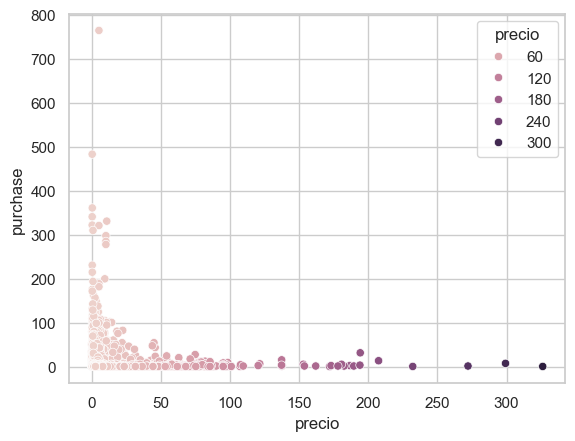

In [33]:
sns.scatterplot(data = prod[prod.purchase > 0], x = 'precio', y = 'purchase', hue = 'precio');

### Relación entre el precio por debajo de 50€ y el volumen de ventas

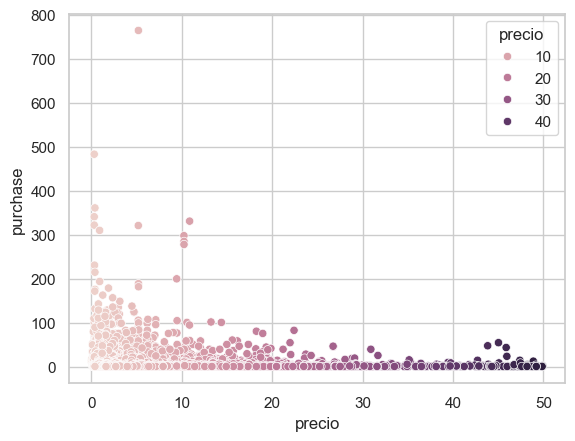

In [34]:
sns.scatterplot(data = prod[(prod.purchase > 0) & (prod.precio < 50)], x = 'precio', y = 'purchase', hue = 'precio');

### Productos que se eliminan del carrito

In [35]:
prod.insert(loc = 4,
            column = 'remove_from_cart_porc',
            value = prod.remove_from_cart / prod.cart *100 )
prod

,producto,view,cart,remove_from_cart,remove_from_cart_porc,purchase,precio
0,3752,10,0,0,NaN,0,15.71
1,3762,258,127,59,46.46,28,19.29
2,3763,51,10,2,20.00,2,16.00
3,3771,9,0,0,NaN,0,15.08
4,3774,76,26,13,50.00,7,15.92
...,...,...,...,...,...,...,...
45322,5932537,1,1,0,0.00,0,1.43
45323,5932538,1,0,0,NaN,0,1.43
45324,5932540,2,1,0,0.00,0,1.43
45325,5932578,1,0,0,NaN,0,6.02


### Cuales son los productos mas vistos

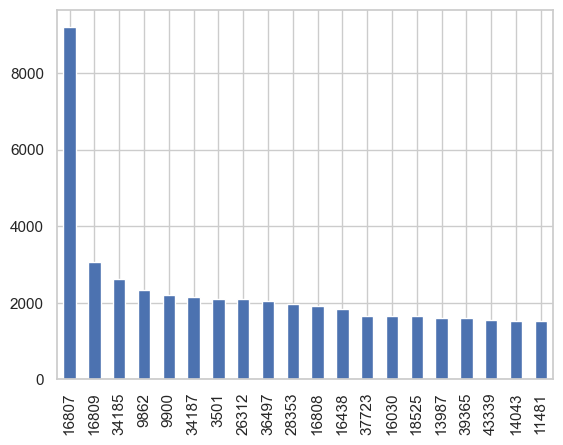

In [36]:
prod.view.sort_values(ascending = False)[0:20].plot.bar();

### Relacion de productos con muchas vistas y pocas compras

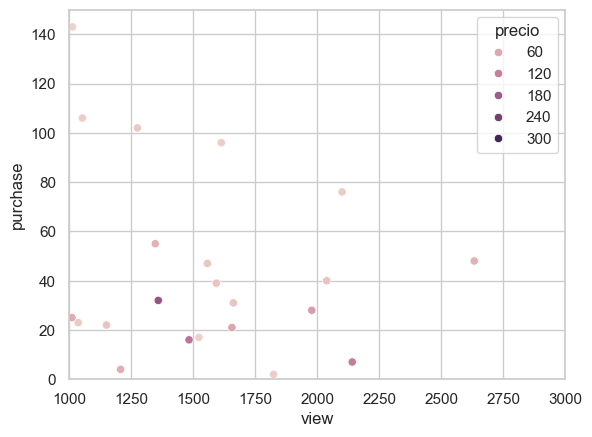

In [38]:
sns.scatterplot(data = prod.loc[prod.view < 4000], x = 'view', y = 'purchase', hue = 'precio')
plt.xlim(1000,3000)
plt.ylim(0,150);

En cada sesión, de media:

* KPIs por sesión: Se ven 2.2 productos
* KPIs por sesión: Se añaden 1.3 productos al carrito
* KPIs por sesión: Se eliminan 0.9 productos del carrito
* KPIs por sesión: Se compran 0.3 productos
* Recurrencia: el 10% de los clientes vuelve a comprar tras el primer mes
* Conversión: 60% de añadir al carrito sobre visualizaciones
* Conversión: 22% de compra sobre añadidos a carrito
* Conversión: 13% de compra sobre visualizaciones
* Facturación media mensual: 125.000€

Ejecutar en conda 'Converting notebook 01_extraction.ipynb to script' para que cree el archivo .py